Text(0, 0.5, 'genlik')

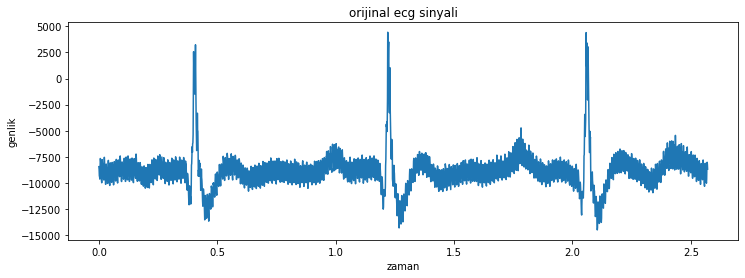

In [1]:
import scipy.io.wavfile 
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

sampleRate, data = scipy.io.wavfile.read(r'C:\Users\EFE\Downloads\ecg.wav')
times = np.arange(len(data))/sampleRate
plt.figure(figsize=(12,4))
plt.plot(times, data)
plt.title("orijinal ecg sinyali")
plt.xlabel("zaman")
plt.ylabel("genlik")


In [2]:
def frekans_cevabi_cizdir (x_n, fs, frekans_nokta_sayisi=500):
 X_f = np.fft.fft(x_n, frekans_nokta_sayisi*2)
 X_f = X_f[:frekans_nokta_sayisi]
 f_ax = np.linspace(0, fs//2, frekans_nokta_sayisi)

 genlik_w= np.abs (X_f)
 faz_w= np.unwrap(np.angle(X_f))

 plt.figure(figsize=(12,3))
    
 plt.subplot(1,2,1)
 plt.title('Genlik spektrumu')
 plt.plot(f_ax,genlik_w, 'b')
 plt.ylabel('|X(f) |')
 plt.xlabel('frekans [Hz]')
 plt.grid()
           
 plt.subplot(1,2,2)
 plt.title('Faz spektrumu')
 plt.plot(f_ax, faz_w, 'g')
 plt.ylabel('faz(X(f)) (radyan)') 
 plt.xlabel('frekans [Hz]')
 plt.grid()
 plt.show()

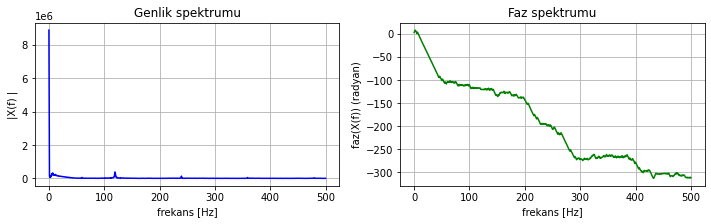

In [3]:
frekans_cevabi_cizdir(data,sampleRate)

In [4]:
data_mean_corrected = data-np.mean(data)

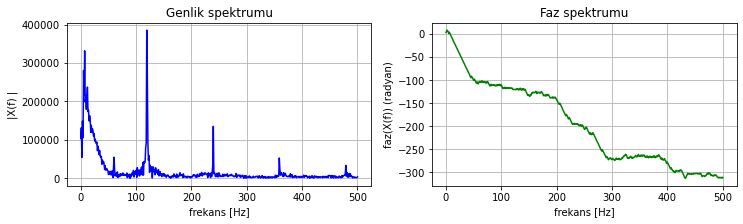

In [5]:
frekans_cevabi_cizdir(data_mean_corrected,sampleRate)

In [6]:
f_c = np.array([49,51]) 
f_max= sampleRate / 2
f_norm=f_c / f_max 
b, a = scipy.signal.butter (3, f_norm, btype='bandstop')
filtered = scipy.signal.filtfilt(b, a, data_mean_corrected )

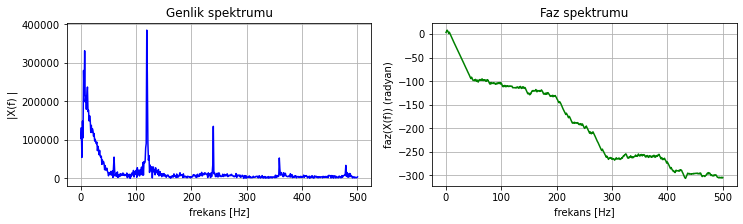

In [7]:
frekans_cevabi_cizdir(filtered,sampleRate)

## Low pass, high pass, band pass filter

In [8]:
b, a = scipy.signal.butter(3, 0.05, 'lowpass')
filteredLowPass = scipy.signal.filtfilt(b, a, data)

b, a = scipy.signal.butter(3, 0.05, 'highpass')
filteredHighPass = scipy.signal.filtfilt(b, a, data)

b, a = scipy.signal.butter(3, [.01, .05], 'band')
filteredBandPass = scipy.signal.lfilter(b, a, data)

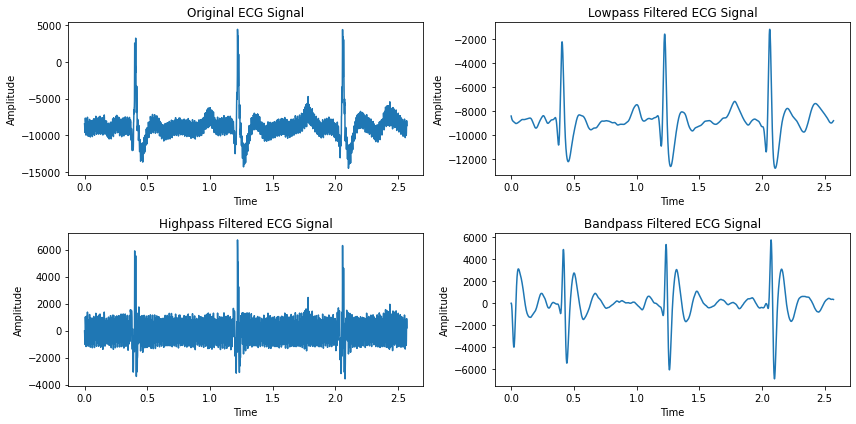

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(221)
plt.plot(times, data)
plt.title("Original ECG Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(222)
plt.plot(times, filteredLowPass)
plt.title("Lowpass Filtered ECG Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(223)
plt.plot(times, filteredHighPass)
plt.title("Highpass Filtered ECG Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(224)
plt.plot(times, filteredBandPass)
plt.title("Bandpass Filtered ECG Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

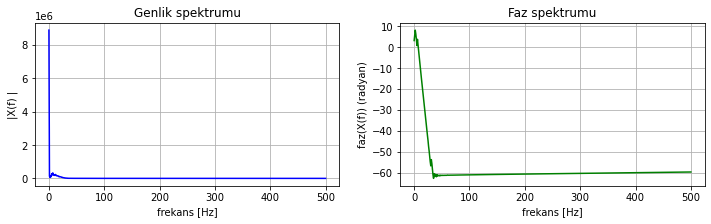

In [10]:
frekans_cevabi_cizdir(filteredLowPass,sampleRate)

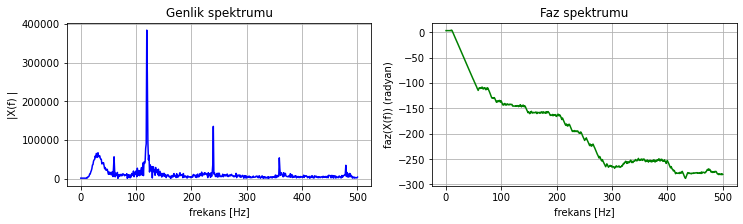

In [11]:
frekans_cevabi_cizdir(filteredHighPass,sampleRate)

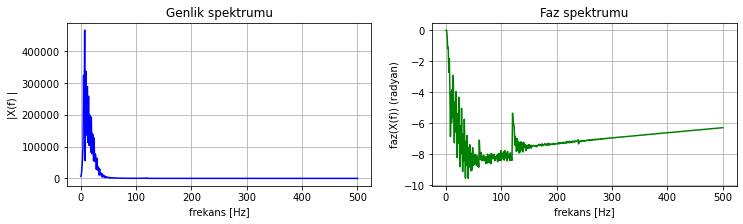

In [12]:
frekans_cevabi_cizdir(filteredBandPass,sampleRate)

In [13]:
# FIR filtre tasarımı için gerekli kütüphane
from scipy.signal import firwin

# FIR filtre tasarım parametreleri
bant_genisligi = 0.1  # Bant genişliği (0-1 arasında bir değer)

# FIR filtre katsayılarını tasarla
filtre_sira = 101  # FIR filtre sırası (tek sayı olmalı)
fir_katsayilari = firwin(filtre_sira, bant_genisligi)

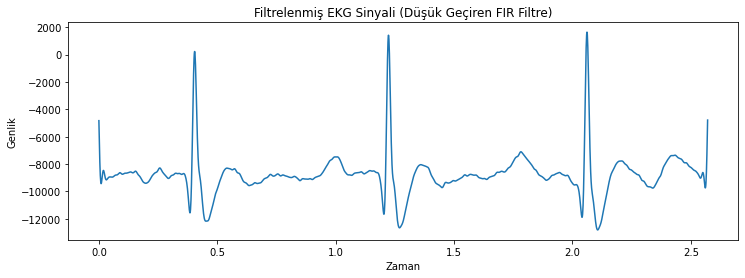

In [14]:
# Filtreleme işlemi
filtrelenmis_sinyal = np.convolve(data, fir_katsayilari, mode='same')

# Filtrelenmiş sinyali görselleştirme
plt.figure(figsize=(12, 4))
plt.plot(times, filtrelenmis_sinyal)
plt.title("Filtrelenmiş EKG Sinyali (Düşük Geçiren FIR Filtre)")
plt.xlabel("Zaman")
plt.ylabel("Genlik")
plt.show()

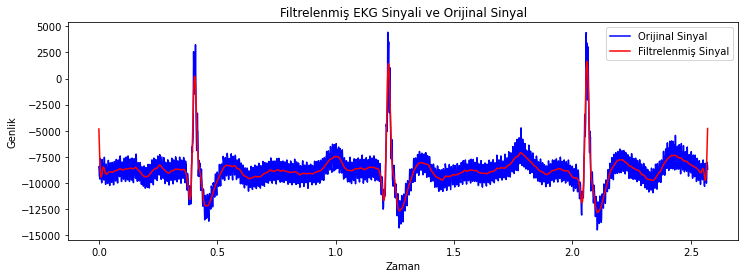

In [15]:
# Orijinal sinyali görselleştirme
plt.figure(figsize=(12, 4))
plt.plot(times, data, label="Orijinal Sinyal", color="blue")

# Filtrelenmiş sinyali görselleştirme
plt.plot(times, filtrelenmis_sinyal, label="Filtrelenmiş Sinyal", color="red")

plt.title("Filtrelenmiş EKG Sinyali ve Orijinal Sinyal")
plt.xlabel("Zaman")
plt.ylabel("Genlik")
plt.legend()
plt.show()

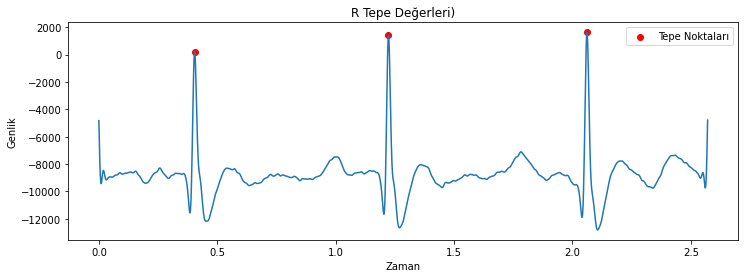

In [16]:
from scipy.signal import find_peaks

# Tepe noktalarını bulma
peaks, _ = find_peaks(filtrelenmis_sinyal, distance=700)

# Orijinal sinyali görselleştirme
plt.figure(figsize=(12, 4))
plt.plot(times, filtrelenmis_sinyal)
plt.title("R Tepe Değerleri)")
plt.xlabel("Zaman")
plt.ylabel("Genlik")

# Tepe noktalarını işaretlemek için scatter plot kullanma
plt.scatter(times[peaks], filtrelenmis_sinyal[peaks], color='red', label='Tepe Noktaları')

plt.legend()
plt.show()


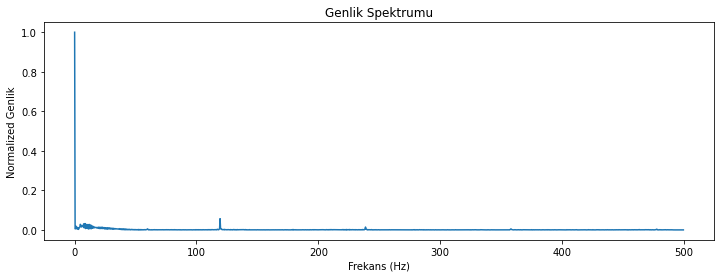

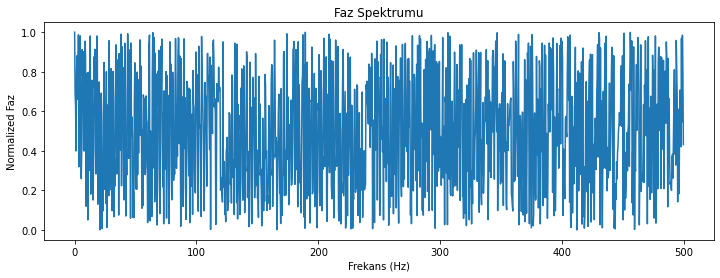

In [17]:
# Genlik spektrumunu hesaplama
genlik_spektrumu = np.abs(np.fft.fft(data))
genlik_spektrumu = genlik_spektrumu[:len(genlik_spektrumu)//2]  # Yalnızca pozitif frekanslar

# Genlik spektrumunu normalize etme
genlik_spektrumu = genlik_spektrumu / np.max(genlik_spektrumu)

# Faz spektrumunu hesaplama
faz_spektrumu = np.angle(np.fft.fft(data))
faz_spektrumu = faz_spektrumu[:len(faz_spektrumu)//2]  # Yalnızca pozitif frekanslar

# Faz spektrumunu normalize etme
faz_spektrumu = (faz_spektrumu + np.pi) / (2 * np.pi)

# Genlik spektrumunu çizdirme
frekanslar = np.fft.fftfreq(len(data), d=1/sampleRate)
frekanslar = frekanslar[:len(frekanslar)//2]  # Yalnızca pozitif frekanslar

plt.figure(figsize=(12, 4))
plt.plot(frekanslar, genlik_spektrumu)
plt.title("Genlik Spektrumu")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Normalized Genlik")
plt.show()

# Faz spektrumunu çizdirme
plt.figure(figsize=(12, 4))
plt.plot(frekanslar, faz_spektrumu)
plt.title("Faz Spektrumu")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Normalized Faz")
plt.show()

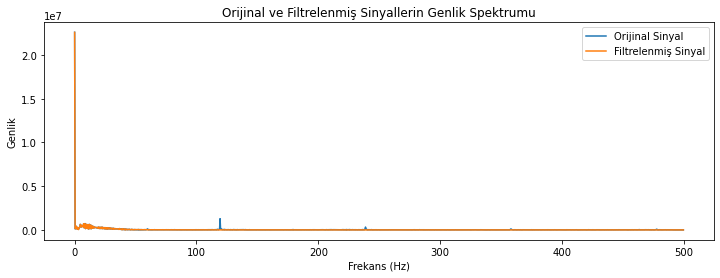

In [18]:
# Orijinal sinyalin genlik spektrumu
orijinal_genlik_spektrumu = np.abs(np.fft.fft(data))
orijinal_genlik_spektrumu = orijinal_genlik_spektrumu[:len(orijinal_genlik_spektrumu)//2]  # Yalnızca pozitif frekanslar

# Filtrelenmiş sinyalin genlik spektrumu
filtrelenmis_genlik_spektrumu = np.abs(np.fft.fft(filtrelenmis_sinyal))
filtrelenmis_genlik_spektrumu = filtrelenmis_genlik_spektrumu[:len(filtrelenmis_genlik_spektrumu)//2]  # Yalnızca pozitif frekanslar

# Frekanslar
frekanslar = np.fft.fftfreq(len(data), d=1/sampleRate)
frekanslar = frekanslar[:len(frekanslar)//2]  # Yalnızca pozitif frekanslar

# Genlik spektrumlarını üst üste çizdirme
plt.figure(figsize=(12, 4))
plt.plot(frekanslar, orijinal_genlik_spektrumu, label="Orijinal Sinyal")
plt.plot(frekanslar, filtrelenmis_genlik_spektrumu, label="Filtrelenmiş Sinyal")
plt.title("Orijinal ve Filtrelenmiş Sinyallerin Genlik Spektrumu")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Genlik")
plt.legend()
plt.show()

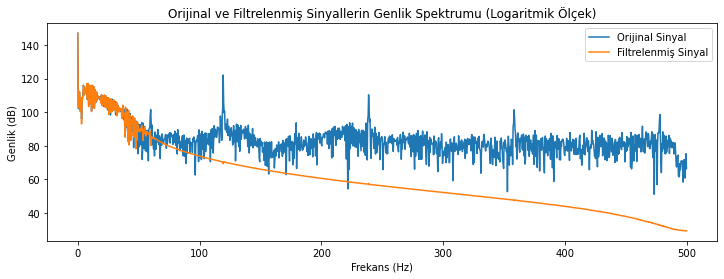

In [19]:
# Orijinal sinyalin genlik spektrumu
orijinal_genlik_spektrumu = np.abs(np.fft.fft(data))
orijinal_genlik_spektrumu = orijinal_genlik_spektrumu[:len(orijinal_genlik_spektrumu)//2]  # Yalnızca pozitif frekanslar
orijinal_genlik_spektrumu = 20 * np.log10(orijinal_genlik_spektrumu)  # Genlikleri logaritmik ölçekte

# Filtrelenmiş sinyalin genlik spektrumu
filtrelenmis_genlik_spektrumu = np.abs(np.fft.fft(filtrelenmis_sinyal))
filtrelenmis_genlik_spektrumu = filtrelenmis_genlik_spektrumu[:len(filtrelenmis_genlik_spektrumu)//2]  # Yalnızca pozitif frekanslar
filtrelenmis_genlik_spektrumu = 20 * np.log10(filtrelenmis_genlik_spektrumu)  # Genlikleri logaritmik ölçekte

# Frekanslar
frekanslar = np.fft.fftfreq(len(data), d=1/sampleRate)
frekanslar = frekanslar[:len(frekanslar)//2]  # Yalnızca pozitif frekanslar

# Genlik spektrumlarını çizdirme
plt.figure(figsize=(12, 4))
plt.plot(frekanslar, orijinal_genlik_spektrumu, label="Orijinal Sinyal")
plt.plot(frekanslar, filtrelenmis_genlik_spektrumu, label="Filtrelenmiş Sinyal")
plt.title("Orijinal ve Filtrelenmiş Sinyallerin Genlik Spektrumu (Logaritmik Ölçek)")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Genlik (dB)")
plt.legend()
plt.show()

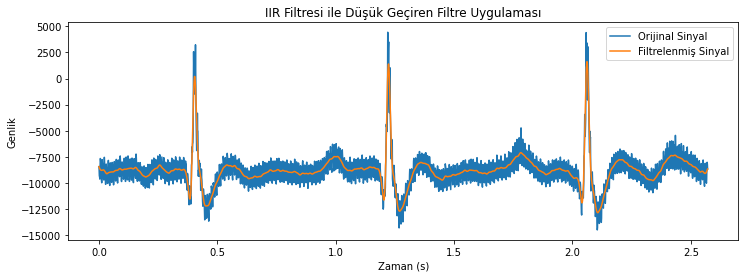

In [20]:
#IIR Filtre tasarımı
from scipy.signal import butter, filtfilt

# Filtre tasarımı için parametreler
cutoff_freq = 50  # Kesim frekansı (Hz)
filter_order = 4  # Filtre sırası

# IIR filtresini tasarlama
b, a = butter(filter_order, cutoff_freq, fs=sampleRate, btype='low', analog=False, output='ba')

# Filtrelenmiş sinyali elde etme
iir_filtrelenmis_sinyal = filtfilt(b, a, data)

# Orijinal ve filtrelenmiş sinyalleri çizdirme
plt.figure(figsize=(12, 4))
plt.plot(times, data, label='Orijinal Sinyal')
plt.plot(times, iir_filtrelenmis_sinyal, label='Filtrelenmiş Sinyal')
plt.title('IIR Filtresi ile Düşük Geçiren Filtre Uygulaması')
plt.xlabel('Zaman (s)')
plt.ylabel('Genlik')
plt.legend()
plt.show()